In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
import pandas as pd

data_path = '../blue_berry/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col= 'id')

In [3]:
train

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394


In [4]:
test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [5]:
submission

,yield
id,
15289,6025.194
15290,6025.194
15291,6025.194
15292,6025.194
15293,6025.194
...,...
25478,6025.194
25479,6025.194
25480,6025.194


In [6]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN


In [7]:
all_data = all_data.drop('yield' , axis = 1) # 타깃값 제거

all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [8]:
corrMat = train[train.columns.tolist()[:-1]].corr()
corrMat

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
clonesize,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898
honeybee,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261
bumbles,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022
andrena,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504
osmia,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597
MaxOfUpperTRange,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963
MinOfUpperTRange,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812
AverageOfUpperTRange,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082
MaxOfLowerTRange,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378
MinOfLowerTRange,0.016026,0.005809,-0.001804,-0.013035,-0.031486,0.999829,0.998953,0.999973,0.999489,1.000000,0.999963,0.011466,0.010479,0.007909,0.146704,0.061360


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

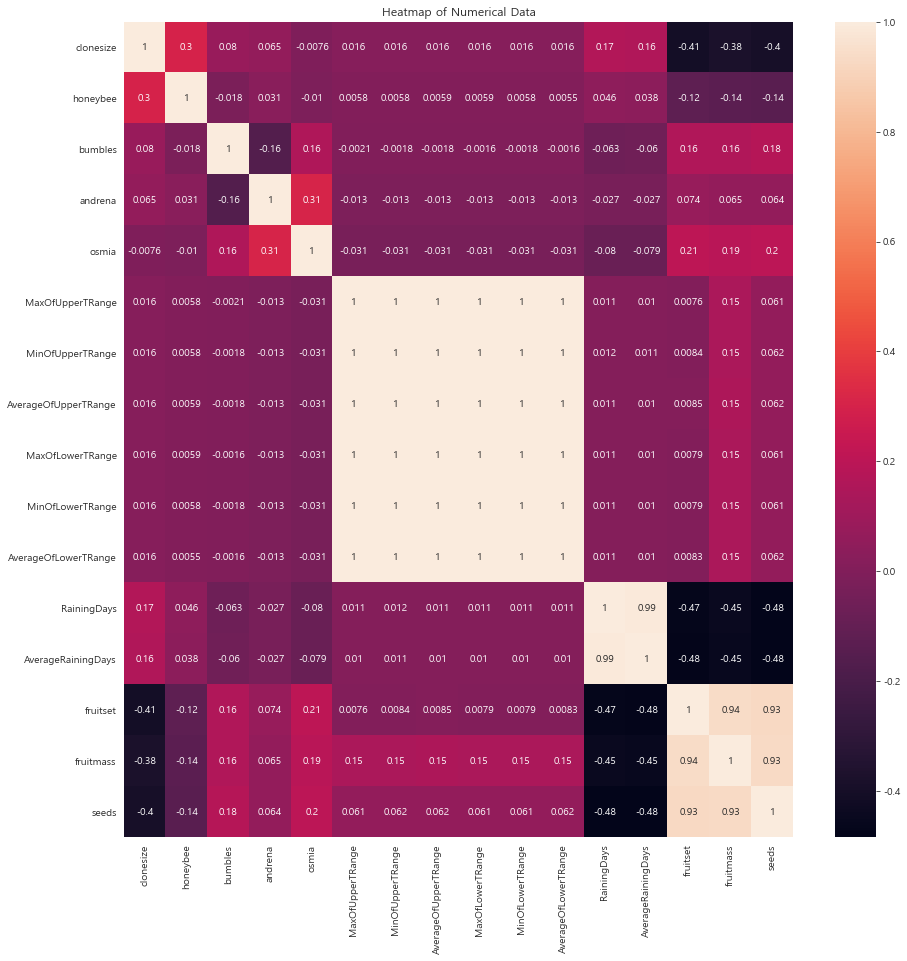

In [9]:
fig,ax = plt.subplots()
fig.set_size_inches(15,15)

sns.heatmap(corrMat , annot =True )
ax.set(title='Heatmap of Numerical Data')

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

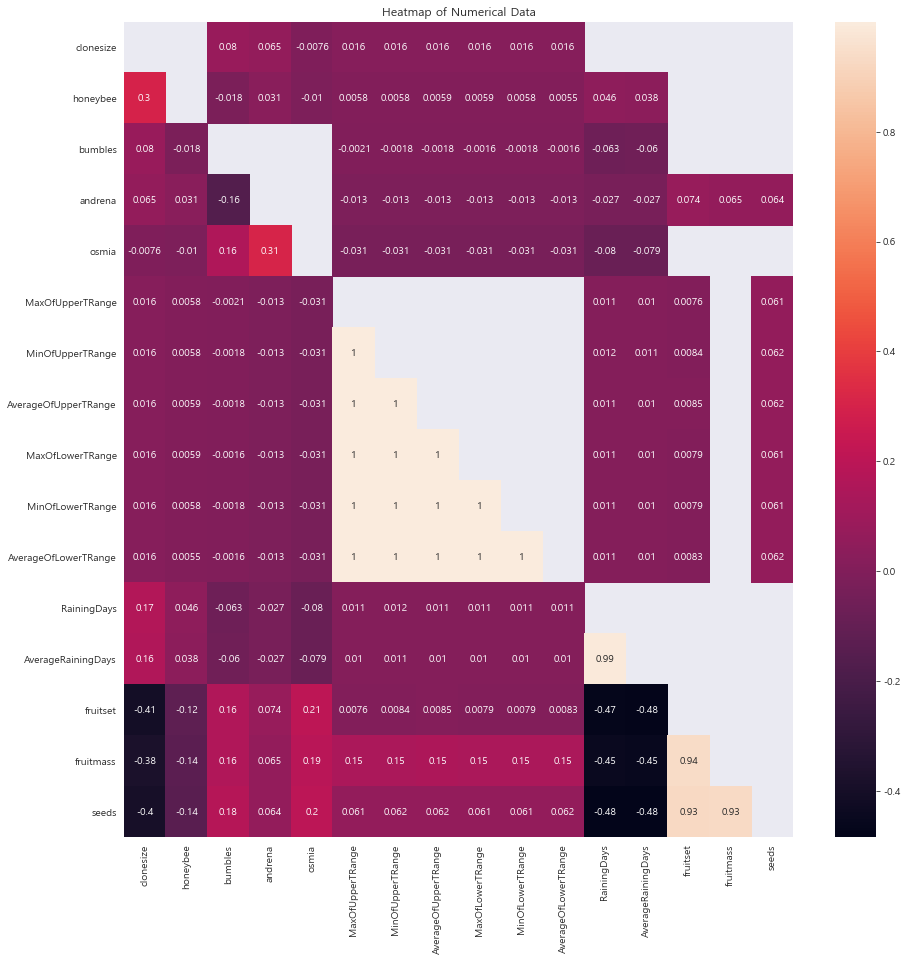

In [10]:
# Mask for correlation values less than 0.1
fig,ax = plt.subplots()
fig.set_size_inches(15,15)
mask = np.zeros_like(corrMat)
mask[np.triu_indices_from(mask)] = True
mask[np.abs(corrMat) < 0.1] = False

sns.heatmap(corrMat, annot=True, mask=mask)
ax.set(title='Heatmap of Numerical Data')

## 베이스라인 모델_랜덤포레스트_회귀

In [11]:
all_data = all_data.drop('yield' , axis=1)
all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [12]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [13]:
%%time


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# 선형 회귀 모델 초기화
lr_model = LinearRegression()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lr = {
    'fit_intercept': [True, False],        # 절편 사용 여부
    #'normalize': [True, False]             # 특성 정규화 여부
    'n_jobs' : [-1]
}

# 그리드 서치 객체 생성
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5)

# 그리드 서치 수행
grid_search_lr.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lr = grid_search_lr.best_estimator_
best_params_grid_search_lr = grid_search_lr.best_params_
print("Best Model (Linear Regression):", best_model_grid_search_lr)
print("Best Parameters (Linear Regression):", best_params_grid_search_lr)




Best Model (Linear Regression): LinearRegression(n_jobs=-1)
Best Parameters (Linear Regression): {'fit_intercept': True, 'n_jobs': -1}
Wall time: 131 ms


In [14]:
y_preds = best_model_grid_search_lr.predict(X_test)

y_preds

array([4303.944, 6107.943, 7251.01 , ..., 6935.192, 4449.951, 7325.748])

In [15]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_linear_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [5, 26, 16, 40, 33]


In [16]:
all_data.columns.tolist()

['clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

In [19]:
all_data['clonesize']

id
0        25.0
1        25.0
2        12.5
3        12.5
4        25.0
         ... 
25478    25.0
25479    25.0
25480    25.0
25481    12.5
25482    12.5
Name: clonesize, Length: 25483, dtype: float64

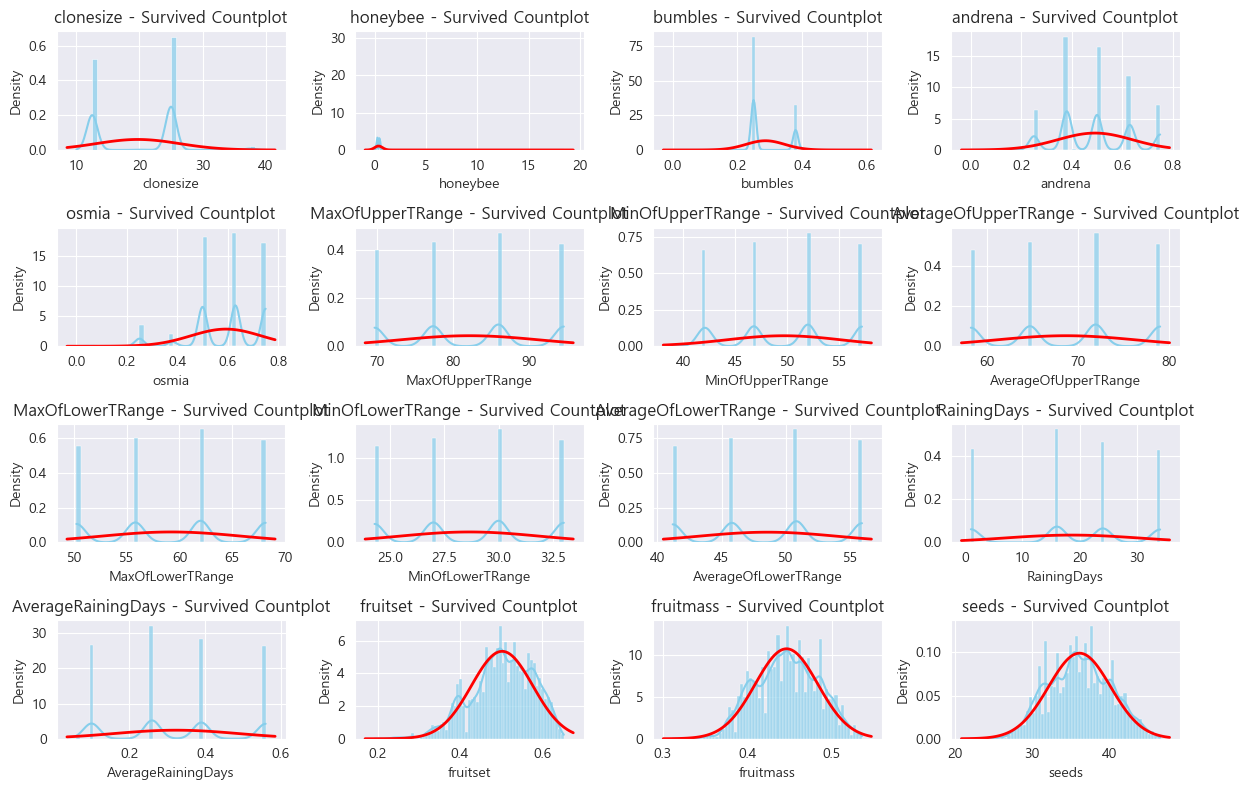

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 서브플롯을 생성할 크기 설정
plt.figure(figsize=(12, 8))
# sns.countplot(x='clonesize', hue='yield', data=train)
# 피처들의 리스트
features = all_data.columns.tolist()

# 피처들에 대한 countplot 그리기
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(all_data[feature], kde=True, stat='density', color='skyblue', alpha=0.7)
    mu, std = norm.fit(all_data[feature].dropna())
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)
    plt.title(f'Features distribution (mu={mu:.2f}, std={std:.2f})')
    plt.title(f'{feature} - Survived Countplot')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


Text(0.5, 1.0, 'Features distribution (mu=19.74, std=6.59)')

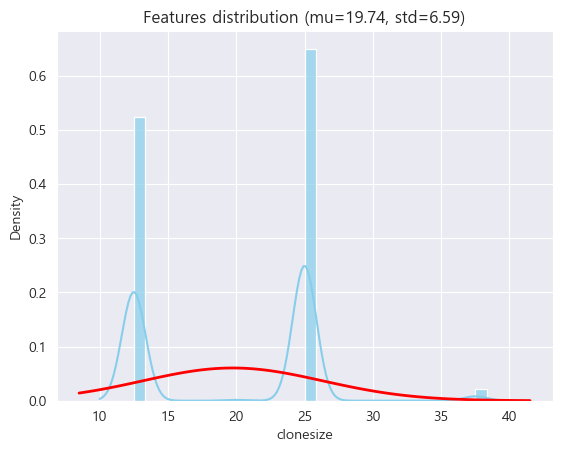

Text(0.5, 1.0, 'Features distribution (mu=0.50, std=0.07)')

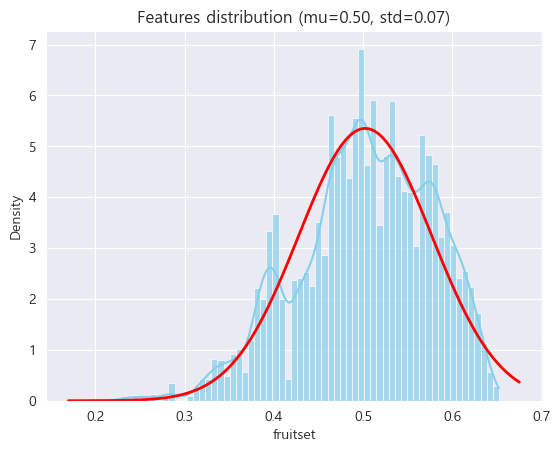

In [23]:
sns.histplot(all_data['fruitset'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data['fruitset'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Features distribution (mu={mu:.2f}, std={std:.2f})')

In [15]:
# import datetime
#
# # 현재 날짜와 시각 구하기
# now = datetime.datetime.now()
# date_list = [now.month, now.day, now.hour, now.minute]
# # 현재 날짜와 시각 출력하기
# print("현재 날짜 및 시각 : ", date_list)
#
# # 제출 파일 생성
#
# submission['yield'] = y_preds
# submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

## 베이스라인 모델 선형 모델

### 그리드서치 객체 생성

- 그리드서치는 하이퍼파라미터의 값을바꿔가며'모델'의 성능을 교차검증으로 '평가'해 최적의 하이퍼파라미터 값을 찾아준다.

- 비교 검증해볼 하이퍼파라미터 값 목록

- 대상 모델

- 교차 검증용 평가 수단(평가 함수)
## 회귀 평가지표

- 회귀 모델을 훈련해 최적의 회귀계수를 구할 수 있다.

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()
import numpy as np

#
def rmsle(y_true, y_pred, convertExp=True):
    # 지수 변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output



# 하이퍼파라미터 값 목록

ridge_params = {'max_iter': [3000], 'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# alpha 값이 클수록 규제 강도가 세진다.

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,  # 릿지 모델
                                      param_grid=ridge_params,  # 값 목록
                                      scoring=rmsle_scorer,  # 평가지표,
                                      cv=5)  # 교차검증 분할 수
## 그리드서치 수행
# log_y = np.log(y_train)  # 타깃값 로그변환

gridsearch_ridge_model.fit(X_train, y_train)  # 훈련(그리드서치)
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)
# 예측

preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가
#
# print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True) :.4f}')

ridge_model_preds = gridsearch_ridge_model.predict(X_test)
# print(linear_reg_model.score(X_train, preds))

ridge_model_preds
gridsearch_ridge_model


C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
<ipython-input-17-3c211142254d>:20: RuntimeWarning: overflow encountered in square
  output = np.sqrt(np.mean((log_true - log_pred) ** 2))
C:\Users\andyp\anaconda3\lib\site

최적 하이퍼파라미터 : {'alpha': 100, 'max_iter': 3000}


<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.p

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [18]:
# 타깃값 1일 확룰 예측

y_preds= gridsearch_ridge_model.predict(X_test)
y_preds

array([4482.82 , 6314.821, 7146.68 , ..., 6500.538, 4622.844, 7381.351])

In [19]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

현재 날짜 및 시각 :  [5, 18, 20, 31]


## 랜덤포레스트 회귀 모델

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
#
# # 모델 생성
# randomforest_model = RandomForestRegressor()
#
# # 그리드서치 객체 생성
# rf_params = {'random_state':[123, 369, 1004], 'n_estimators':[150, 250, 500, 1000],
#              'max_depth':[5, 10, 15, 20, 30], 'max_features':["auto", "sqrt", "log2"]}
#
#
# # randomstate :
# grid_rf_model = GridSearchCV(estimator=randomforest_model, param_grid=rf_params, scoring='r2', cv=5)
#
# # estimator = 모델 이름
# # param_grid = 값 목록
# # scoring = 평가지표
# # cv = 교차검증 분할 수
# # log_y = np.log(y_train) # y= X_train['SalesPrice']
# grid_rf_model.fit(X_train, y_train)
# print(grid_rf_model.best_params_)

In [ ]:
# # 예측
#
# preds = grid_rf_model.best_estimator_.predict(X_train)
#
# # 평가
#
# # print(f'랜덤포레스트 RMSLE 값 : {rmsle(log_y , preds , True) :.4f}')
#
# grid_rf_model_preds = grid_rf_model.predict(X_test)
# # print(linear_reg_model.score(X_train,preds))
#
# grid_rf_model_preds

In [ ]:
# y_preds = grid_rf_model_preds
#
# # 현재 날짜와 시각 구하기
# now = datetime.datetime.now()
# date_list = [now.month, now.day, now.hour, now.minute]
# # 현재 날짜와 시각 출력하기
# print("현재 날짜 및 시각 : ", date_list)
#
# # 제출 파일 생성
#
# submission['yield'] = y_preds
# submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

## 부스팅 모델 LightGBM 사용해보기

## OOF 예측 방식을 활용한 베이스라인 모델 훈련시키기

In [76]:
from scipy import sparse

all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
all_data = all_data.drop('yield' , axis = 1) # 타깃값 제거

# all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]) , encoded_cat_matrix] , format= 'csr')
#
# all_data_sprs
all_data_sprs = sparse.csr_matrix(all_data)
all_data_sprs

<25483x16 sparse matrix of type '<class 'numpy.float64'>'
	with 407673 stored elements in Compressed Sparse Row format>

In [77]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['yield'].values

In [78]:
import numpy as np

def eval_gini(y_true , y_pred):
    # 실제값과 예측값의 크기가 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0] # 데이터 개수
    L_mid = np.linspace(1/ n_samples ,1 , n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수

    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선

    G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수

    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true) # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [79]:
# LightGBM 용 gini() 함수

def gini(preds , dtrain):
    labels = dtrain.get_label()

    return 'gini' , eval_gini(labels , preds ) , True

In [80]:
# OOF 방식으로 LightGBM 훈련
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기

folds = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1991)

# 층화 K 폴드 교차 검증기는 타깃값이 불균형하므로 K폴드가 아닌 층화 K폴드를 수행하는 게 바람직하다. 층화 K폴드는 타깃값이 균등하게
# 폴드를 나누는 방식이기 때문이다.


# n_splits 파라미터로 전달한 수만큼 폴드를 나눈다. 여기서는 5개로 나누었다. shuffle = True 를 전달하면 폴드를 나눌때 데이터를 섞어준다.

In [81]:
# LightGBM의 하이퍼파라미터를 설정한다. LightGBM은 하이퍼파라미터를 갖고 있지만, 여기서는 4가지만 설정한다.

params = {'objective' : 'binary' , 'learning_rate' : 0.01 , 'force_row_wise' : True , 'random_state' : 0}

# 이진분류 문제이므로 objective 파라미터는 binary로 설정했다. 학습률은 0.01로, 랜덤 스테이트 값은 9으로 설정했다.
# force_row_wise : True 는 경고 문구를 없애려고 추가한 파라미터이다.

In [82]:
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])

# ==> oof_val_preds 는 검증 데이터를 활용해 예측한 확률값을 저장하는 배열이다. K 폴드로 나누어도 훈련 데이터 전체가 결국엔 한 번씩 검증 데이터로 활용된다. 따라서 oof_val_preds 배열 크기는 훈련 데이터와 같아야 한다.
# 훈련 데이터 개수는 X.shpae[0]으로 구한다.

# OOF 방식으로 훈련된 모델로 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# oof_test_preds는 테스트 데이터를 활용해 예측한 확률값을 저장하는 배열이다. 최종 제출에 사용할 값이므로 크기는 테스트 데이터와 같아야한다. 테스트 데이터 개수는 X_test.shape[0]으로 구한다.

In [83]:
X

<15289x16 sparse matrix of type '<class 'numpy.float64'>'
	with 244589 stored elements in Compressed Sparse Row format>

In [84]:
y

array([4476.811, 5548.122, 6869.778, ..., 4696.444, 6772.933, 5867.997])

In [86]:
import lightgbm as lgb

# OOF 방식으로 모델 훈련 , 검증 , 예측
print( i for i in folds.split(X,y))
#
for idx, (train_idx , valid_idx) in enumerate(folds.split(X, y)):
    print(idx)
    # 각 폴드를 구분하는 문구 출력
    print('#'*40 , f'폴드 {idx +1} / 폴드 {folds.n_splits}' , '#'*40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx] # 훈련용 데이터
    X_valid , y_valid = X[valid_idx] , y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train , y_train) # LightGBM 전용 훈련 데이터 셋
    dvalid = lgb.Dataset(X_valid , y_valid) # LightGBM 전용 검증 데이터 셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = params , # 훈련용 하이퍼파라미터
                          train_set = dtrain, # 훈련 데이터 셋
                          num_boost_round = 1000, # 부스팅 반복 횟수
                          valid_sets=  dvalid ,  # 성능 평가용 검증 데이터 셋
                          feval = gini, # 검증용 평가지표
                          early_stopping_rounds = 100, # 조기종료 조건
                          verbose_eval = 100 ) # 100번째마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측

    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터 예측 확률에 대한 정규화 지니계수

    gini_score = eval_gini(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx +1} 지니계수 : {gini_score}\n')

<generator object <genexpr> at 0x000001CCDA42DE40>


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
print('OOF 검증 데이터 지니계수 : ' , eval_gini(y , oof_val_preds))